<center>
    <h1> ILI285 - Computación Científica I  / INF285 - Computación Científica </h1>
    <h2> Tarea 1 </h2>
    <h2> [S]cientific [C]omputing [T]eam </h2>
</center>

_Marzo 2017_

- **Nombre del Estudiante**: Marcelo Ignacio Jara Almeyda
- **Email**: `marcelo.jara.13@sansano.usm.cl`
- **Rol**: 201373015-9

# Tabla de Contenidos
* [1.- Objetivos](#obj)
* [2.- Hints](#hints)
* [3.- Numpy y SciPy](#numpy_scipy)
* [4.- SymPy](#sympy)
* [5.- Matplotlib](#matplotlib)
* [6.- Hands-On](#hands-on)
* [7.- Instrucciones](#instr)

<div id='obj' />
# 1. Objetivos

Para la presente tarea tiene por objetivos:

* Familiarizarse con las librerias de python que se utilizarán en el curso.
* Recordar conceptos importantes que se aprendieron en los cursos de Matemáticas.

<div id='obj' />
# 2. Hints

* _Markdown_ https://help.github.com/articles/basic-writing-and-formatting-syntax/
* _numpy_ http://www.numpy.org
* _scipy_ https://www.scipy.org/scipylib/index.html
* _sympy_ http://docs.sympy.org/latest/index.html
* _matplotlib_ http://matplotlib.org
* _ipywidgets_ https://github.com/ipython/ipywidgets
* _magic_ Use el siguiente magic: `%matplotlib inline`. http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sym
import scipy as sp
from ipywidgets import interact

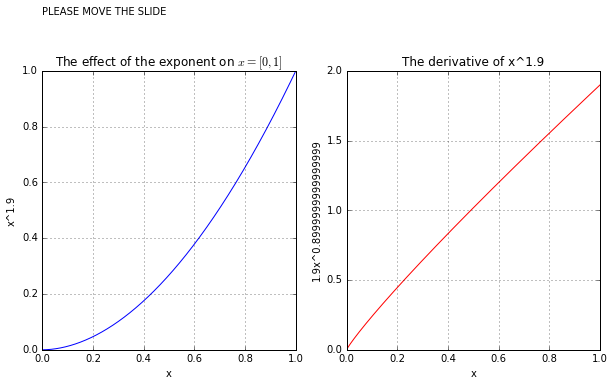

In [2]:
def show_time(alpha=1):
    # Creating the plot
    plt.figure(figsize=(10,5))
    # Creating a vector with 10000 components
    x  = np.linspace(0.001,1,10000)
    
    # Selecting first plot
    plt.subplot(121)
    # Plotting x^alpha
    plt.plot(x,np.power(x,alpha),'-')
    # Adding the grid, this is nice because the plots look pretty.
    plt.grid(True)
    # Labels
    plt.xlabel('x')
    plt.ylabel('x^'+str(alpha))
    # The title, notice it is able to handle LaTeX.
    plt.title('The effect of the exponent on $x=[0,1]$')
    # This is just to show you what to do.
    plt.text(0,1.2,'PLEASE MOVE THE SLIDE')
    
    # Selecting second plot
    plt.subplot(122)
    # Plotting alpha x^(alpha-1)
    plt.plot(x,alpha*np.power(x,alpha-1),'r-')
    # Adding the grid, this is nice because the plots look pretty.
    plt.grid(True)
    # Labels
    plt.xlabel('x')
    plt.ylabel(str(alpha)+'x^'+str(alpha-1))
    # The title, notice it is able to handle LaTeX.
    plt.title('The derivative of x^'+str(alpha))
    plt.show()
    
# Here we are using the ipywidget, it is very useful for analysing several 
# plots without generating all of them right away but on-demand.
interact(show_time,alpha=(0.1,3,0.1))

<div id='numpy_scipy' />
# 3. _Numpy y SciPy_

1. Implemente el producto matriz vector y compare el resultado sobre matrices aleatorias con el producto matriz de numpy. Realice el experimento para $10.000$ de tamaño $100\times100$, presente los resultados en un histograma (numpy.histogram) de la norma del error entre su código y producto matriz vector de numpy.
1. Construya una matriz diagonal dominante con operaciones vectoriales. ¿Cómo demuestra que es diagonal dominante?
1. Multiplique 2 matrices diagonal dominante, ¿Es la matriz resultante diagonal dominante?
1. Resuelva los siguientes sistemas de ecuaciones lineales para los $x_i$'s:
    1. $x_1+1=x_2$, $x_1+x_2=10$
    2. $\displaystyle{\sum_{i=1}^{20} x_{i}}=1$, $\displaystyle{\sum_{i=1}^{20} a_{j,i}\,x_{i}}=1$, para $j=2 \dots 20$ y $a_{j,i}=(i+j)\exp{-(i-j)}$
1. Construya un código basdo en scipy.optimize que encuentré el mínimo de $F(a_0,a_1)=\displaystyle{\sum_{i=1}^{1000}}(\exp(x_i)-a_0-a_1\,x_i)$, donde $x_i=-1+\frac{2}{999}(i-1)$.

1) Implemente el producto matriz vector y compare el resultado sobre matrices aleatorias con el producto matriz de numpy. Realice el experimento para $10.000$ de tamaño $100\times100$, presente los resultados en un histograma (numpy.histogram) de la norma del error entre su código y producto matriz vector de numpy.

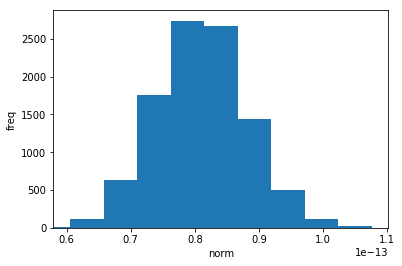

In [115]:
def dot(matrix, vector):
    result = np.zeros(100)
    row = 0
    for col in range(100):
        total = 0
        for row in range(100):
            total += matrix[col][row] * vector[row]

        result[col] = total
    return result


def norm(m1, m2):
    return np.linalg.norm(m1 - m2)


N = 10000

norms = np.zeros(N)
for i in range(N):
    matrix = np.random.random((100, 100))
    vector = np.random.random(100)

    norms[i] = norm(dot(matrix, vector), np.dot(matrix, vector))

y, x = np.histogram(norms)

plt.bar(x[:-1], y, width=x[1]-x[0])
plt.xlim(min(x), max(x))
plt.xlabel('norm')
plt.ylabel('freq')
plt.show()

2) Construya una matriz diagonal dominante con operaciones vectoriales. ¿Cómo demuestra que es diagonal dominante?

In [6]:
print(np.random.random((5, 5)) + np.eye(5) * 4)

[[ 4.08833754  0.12514495  0.21089784  0.18327673  0.15619661]
 [ 0.73163408  4.53454388  0.31018092  0.48483504  0.30761203]
 [ 0.23895876  0.01457468  4.24693665  0.41339217  0.66259455]
 [ 0.97224298  0.41292326  0.097338    4.40920196  0.15702283]
 [ 0.9862128   0.30442284  0.99269493  0.34243716  4.44330665]]


3) Multiplique 2 matrices diagonal dominante, ¿Es la matriz resultante diagonal dominante?

Con un contraejemplo nos bastaría para ver que no se cumple.

In [5]:
print(np.array(((2, 1, 1), (1, 2, 1), (1, 1, 2))).dot(np.array(((2, 1, 1), (1, 2, 1), (1, 1, 2)))))

[[6 5 5]
 [5 6 5]
 [5 5 6]]


4) Resuelva los siguientes sistemas de ecuaciones lineales para los $x_i$'s:

$x_1+1=x_2$, $x_1+x_2=10$

In [127]:
fcs = np.array(((1, -1), (1, 1)))
ccs = np.array((-1, 10))

print(np.linalg.solve(fcs, ccs))

[ 4.5  5.5]


$\displaystyle{\sum_{i=1}^{20} x_{i}}=1$, $\displaystyle{\sum_{i=1}^{20} a_{j,i}\,x_{i}}=1$, para $j=2 \dots 20$ y $a_{j,i}=(i+j)\exp{-(i-j)}$

In [4]:
vectors = [np.ones(20)]
for j in range(2, 21):
    vectors.append(np.array([(i + j) * np.exp(-(i - j)) for i in range(1, 21)]))
print(np.linalg.solve(np.array(vectors), np.ones(20)))

[  2.15890100e+13   7.69200126e+13   3.84463171e+14   2.74846697e+15
  -6.15605773e+15  -1.50121383e+16   1.28556821e+16  -1.31074975e+17
  -4.96809091e+16  -3.58172518e+17   2.93454532e+18  -4.71763527e+18
  -2.72272760e+16   9.76614095e+18  -3.89694067e+19   1.04061596e+20
  -1.19683114e+20   1.44184998e+21   9.86126478e+20  -2.38079734e+21]


5) Construya un código basdo en scipy.optimize que encuentré el mínimo de $F(a_0,a_1)=\displaystyle{\sum_{i=1}^{1000}}(\exp(x_i)-a_0-a_1\,x_i)$, donde $x_i=-1+\frac{2}{999}(i-1)$.

<div id='sympy' />
# 4. _SymPy_

1. Obtenga el $\displaystyle{\lim_{x\rightarrow 0}\frac{\sin(x)}{x}}$ con sympy.
1. Obtenga la derivada de $f(x)=\displaystyle{\sin\left(\sum_{i=1}^{20}x^i\right)\cos\left(\prod_{i=1}^{20}\log(x+i)\right)}$
1. Obtenga la parte real e imaginaria de la siguiente función compleja: $f(z)=z^2+1$, donde $z=x+\mathit{i}\,y$ y $\mathit{i}=\sqrt{-1}$
1. Obtenga la inversa de $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$, donde $a,b,c \in \mathbb{R}$
1. Obtenga los valores y vectores propios de $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$, donde $a,b,c \in \mathbb{R}$

In [173]:
sym.init_printing(use_unicode=True)

1) Obtenga el $\displaystyle{\lim_{x\rightarrow 0}\frac{\sin(x)}{x}}$ con sympy.

In [5]:
x = sym.symbols('x')
sym.limit(sym.sin(x) / x, x, 0)

2) Obtenga la derivada de $f(x)=\displaystyle{\sin\left(\sum_{i=1}^{20}x^i\right)\cos\left(\prod_{i=1}^{20}\log(x+i)\right)}$

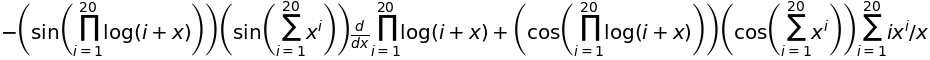

In [11]:
x, i = sym.symbols('x i')

s = sym.sin(sym.Sum(x ** i, [i, 1, 20]))
c = sym.cos(sym.Product(sym.log(x + i), [i, 1, 20]))

sym.diff(c * s, x)

3) Obtenga la parte real e imaginaria de la siguiente función compleja: $f(z)=z^2+1$, donde $z=x+\mathit{i}\,y$ y $\mathit{i}=\sqrt{-1}$

In [12]:
x = sym.symbols('x')
z = x + sym.I

f = (x + sym.I)**2 + 1 # x^2 + 2 * x * i

print("real:   ", sym.re(f))
print("complex:", sym.im(f))

real:    -(im(x) + 1)**2 + re(x)**2 + 1
complex: 2*(im(x) + 1)*re(x)


4) Obtenga la inversa de $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$, donde $a,b,c \in \mathbb{R}$

In [16]:
a, b, c = sym.symbols('a b c')
A = sym.Matrix(((a, b), (c, a)))

A.inv()

⎡1       b⋅c           -b     ⎤
⎢─ + ────────────  ───────────⎥
⎢a    2 ⎛    b⋅c⎞    ⎛    b⋅c⎞⎥
⎢    a ⋅⎜a - ───⎟  a⋅⎜a - ───⎟⎥
⎢       ⎝     a ⎠    ⎝     a ⎠⎥
⎢                             ⎥
⎢      -c               1     ⎥
⎢  ───────────       ───────  ⎥
⎢    ⎛    b⋅c⎞           b⋅c  ⎥
⎢  a⋅⎜a - ───⎟       a - ───  ⎥
⎣    ⎝     a ⎠            a   ⎦

5) Obtenga los valores y vectores propios de $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$, donde $a,b,c \in \mathbb{R}$

In [20]:
print("Valores Propios")
A.eigenvals()

Valores Propios


In [172]:
print("Vectores Propios")
A.eigenvects()

Vectores Propios


⎡⎛      _____     ⎡⎡  -b   ⎤⎤⎞  ⎛      _____     ⎡⎡   b   ⎤⎤⎞⎤
⎢⎜a - ╲╱ b⋅c , 1, ⎢⎢───────⎥⎥⎟, ⎜a + ╲╱ b⋅c , 1, ⎢⎢───────⎥⎥⎟⎥
⎢⎜                ⎢⎢  _____⎥⎥⎟  ⎜                ⎢⎢  _____⎥⎥⎟⎥
⎢⎜                ⎢⎢╲╱ b⋅c ⎥⎥⎟  ⎜                ⎢⎢╲╱ b⋅c ⎥⎥⎟⎥
⎢⎜                ⎢⎢       ⎥⎥⎟  ⎜                ⎢⎢       ⎥⎥⎟⎥
⎣⎝                ⎣⎣   1   ⎦⎦⎠  ⎝                ⎣⎣   1   ⎦⎦⎠⎦

<div id='matplotlib' />
# 5. _Matplotlib_

1. Construya un plot de las siguientes funciones $\sin(x)$, $\cos(x)$, $\exp(\sin(x))$, y $\exp(-\tan^2(x))$ para $x=[0,2\,\pi]$. Todos debes incluirse en el mismo gráfico con diferentes colores y líneas sólidas. Debe incluir la leyenda respectiva, además de las etiquetas de los ejes y el título.
1. Genere $10^6$ números aleatorios de la distribución normal estandar, obtenga un histograma con 50 bins. Grafique el histograma y la distribución normal estandar. ¿Se parecen?
1. Construya la siguiente curva parametrica en 3D: $\vec{r}(t)=\langle \cos(t), \sin(t), t \rangle$.
1. Construya un plot en 2D de las ecuaciones de la pregunta 4.A de la sección Numpy y Scipy. ¿Puede encontrar la solución observando la gráfica? ¿Se puede hacer lo mismo con 4.B?
1. Construya un plot en 3D de la función $F(a_0,a_1)$ de la pregunta 5 de la sección Numpy y Scipy. ¿Puede encontrar el mínimo observando la gráfica?

1) Construya un plot de las siguientes funciones $\sin(x)$, $\cos(x)$, $\exp(\sin(x))$, y $\exp(-\tan^2(x))$ para $x=[0,2\,\pi]$. Todos debes incluirse en el mismo gráfico con diferentes colores y líneas sólidas. Debe incluir la leyenda respectiva, además de las etiquetas de los ejes y el título.

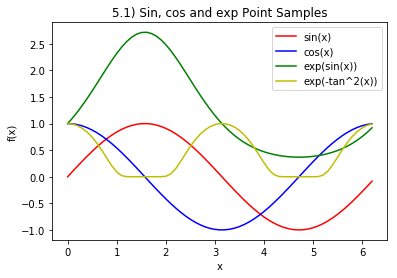

In [212]:
t = np.arange(0, 2 * np.pi, 0.1)

sin_plot = plt.plot(t, np.sin(t), 'r', label='sin(x)')[0]
cos_plot = plt.plot(t, np.cos(t), 'b', label='cos(x)')[0]
esin_plot = plt.plot(t, np.exp(np.sin(t)), 'g', label='exp(sin(x))')[0]
etan_plot = plt.plot(t, np.exp(-np.tan(t) ** 2), 'y', label='exp(-tan^2(x))')[0]

plt.title('5.1) Sin, cos and exp Point Samples')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(handles=[sin_plot, cos_plot, esin_plot, etan_plot])

plt.show()

2) Genere $10^6$ números aleatorios de la distribución normal estandar, obtenga un histograma con 50 bins. Grafique el histograma y la distribución normal estandar. ¿Se parecen?

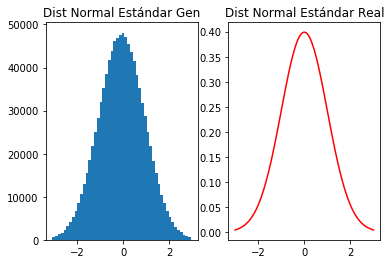

In [13]:
import scipy.stats as stats

points = np.random.normal(size=10**6)
y, x = np.histogram(points, bins=np.linspace(-3, 3, 51))

plt.subplot(1, 2, 1)
plt.title('Dist Normal Estándar Gen')
plt.bar(x[:-1], y, width=x[1]-x[0])

plt.subplot(1, 2, 2)
plt.title('Dist Normal Estándar Real')
linspace = np.linspace(-3, 3, 100)
plt.plot(linspace, stats.norm.pdf(linspace), 'r')

plt.show()

3) Construya la siguiente curva parametrica en 3D: $\vec{r}(t)=\langle \cos(t), \sin(t), t \rangle$.

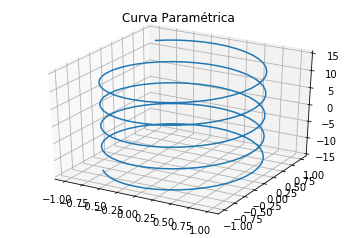

In [171]:
from mpl_toolkits.mplot3d import Axes3D

HEIGHT = 30
RES = 200

z = np.linspace(-HEIGHT / 2, HEIGHT / 2, RES)
x = np.cos(z)
y = np.sin(z)

gca = plt.gca(projection='3d')
gca.plot(x, y, z)
plt.title('Curva Paramétrica')
plt.show()

4) Construya un plot en 2D de las ecuaciones de la pregunta 4.A de la sección Numpy y Scipy. ¿Puede encontrar la solución observando la gráfica? ¿Se puede hacer lo mismo con 4.B?

$x_1+1=x_2$, $x_1+x_2=10$

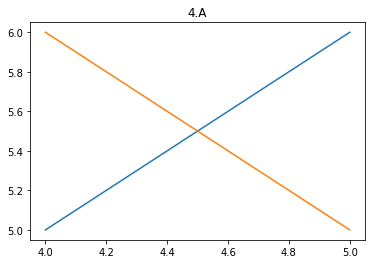

In [4]:
t = np.linspace(4, 5, 10)

plt.title('4.A')
plt.plot(t, t + 1)
plt.plot(t, 10 - t)
plt.show()

$\displaystyle{\sum_{i=1}^{20} x_{i}}=1$, $\displaystyle{\sum_{i=1}^{20} a_{j,i}\,x_{i}}=1$, para $j=2 \dots 20$ y $a_{j,i}=(i+j)\exp{-(i-j)}$

### NO SE :(

5) Construya un plot en 3D de la función $F(a_0,a_1)$ de la pregunta 5 de la sección Numpy y Scipy. ¿Puede encontrar el mínimo observando la gráfica?

$F(a_0,a_1)=\displaystyle{\sum_{i=1}^{1000}}(\exp(x_i)-a_0-a_1\,x_i)$, donde $x_i=-1+\frac{2}{999}(i-1)$.

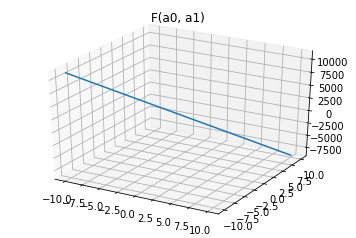

In [164]:
from mpl_toolkits.mplot3d import Axes3D

def f(a0, a1):
    total = 0
    for i in range(1, 1000 + 1):
        x = -1 + 2 / 999 * (i - 1)
        total += np.exp(x) - a0 - a1 * x
    return total

a0 = np.linspace(-10, 10, 200)
a1 = np.linspace(-10, 10, 200)

points = []
for v in zip(a0, a1):
    points.append(f(*v))

gca = plt.gca(projection='3d')
gca.plot(a0, a1, points)
plt.title('F(a0, a1)')
plt.show()

### FALTA REFLEXIÓN SOBRE EL MÍNIMO

<div id='hands-on' />
# 6. _Hands-On_

1. Busque numéricamente la raíz de $\sin(x)$ que está entre $3$ y $3.2$. Ya sabemos que corresponde a $\pi$, pero aquí se quiere encontrar una forma de determinar $\pi$.
1. Grafique $\displaystyle{\frac{\sin(x)}{x}}$ en el intervalo $[-1,1]$. ¿Ocurre algún problema? ¿Cómo se puede corregir?
1. Considere los siguientes puntos: $(0.1,0.7, 4.2)$, $(0.5,0.5, 3.3)$, $(0.9,0.7, 4.2)$ y $(0.18,0.3, 2.5)$. Grafique lo puntos utilizando la función scatter de matplotlib. ¿Cuál es la mejor función lineal que aproxima esos puntos?
1. Construya los siguientes campos vectoriales en 2D: $\langle x,y\rangle$,$\langle -y,x\rangle$ y $\langle x-y,x+y\rangle$ . ¿Qué patron observa?

1) Busque numéricamente la raíz de $\sin(x)$ que está entre $3$ y $3.2$. Ya sabemos que corresponde a $\pi$, pero aquí se quiere encontrar una forma de determinar $\pi$

In [194]:
sp.optimize.brentq(lambda x: np.sin(x), 3, 3.2)

2) Grafique $\displaystyle{\frac{\sin(x)}{x}}$ en el intervalo $[-1,1]$. ¿Ocurre algún problema? ¿Cómo se puede corregir?

Al evaluar en el punto $x = 0$ la función se indefine al dividir por cero, [CORRECCIÓN PENDIENTE]

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide


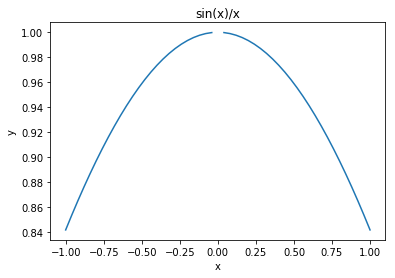

In [19]:
t = np.linspace(-1, 1, 51)

plt.title('sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(t, np.sin(t) / t)
plt.plot(0, 1)

plt.show()

3) Considere los siguientes puntos: $(0.1,0.7, 4.2)$, $(0.5,0.5, 3.3)$, $(0.9,0.7, 4.2)$ y $(0.18,0.3, 2.5)$. Grafique lo puntos utilizando la función scatter de matplotlib. ¿Cuál es la mejor función lineal que aproxima esos puntos?

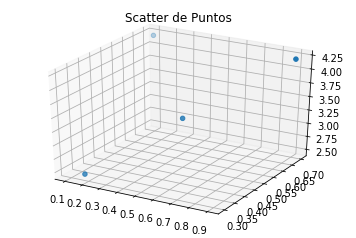

In [203]:
from mpl_toolkits.mplot3d import Axes3D

x = (0.1, 0.5, 0.9, 0.18)
y = (0.7, 0.5, 0.7, 0.3)
z = (4.2, 3.3, 4.2, 2.5)
b
gca = plt.gca(projection='3d')
gca.scatter(x, y, z)
plt.title('Scatter de Puntos')
plt.show()

### NO SE CUAL ES LA MEJOR FUNCION LINEAL QUE LO APROXIMA :(

4) Construya los siguientes campos vectoriales en 2D: $\langle x,y\rangle$,$\langle -y,x\rangle$ y $\langle x-y,x+y\rangle$ . ¿Qué patron observa?

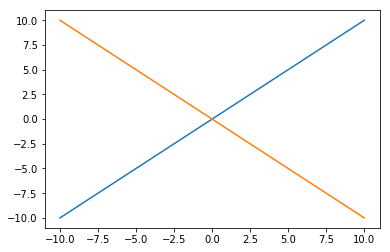

In [213]:
t = np.linspace(-10, 10, 100)

plt.plot(t, t)
plt.plot(- t, t)
# plt.plot(t - t, t + t) # TODO!!
plt.show()

<div id='instr' />
# 7. Instrucciones:
 
 
* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter` notebook (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados cuando se indique.
* El archivo de entrega debe denominarse Tarea1-rol.tar.gz, y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente la versión utilizada de Python.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código, aunque sí se sugiere discutir aspectos generales con sus compañeros. En caso de sospecha de copia, se citará a los involucrados a defender sus conocimientos de manera presencial, evaluación cuya nota reemplazará la obtenida en la tarea.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

# Referencias

- http://matplotlib.org
- https://docs.scipy.org